In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\princ\AppData\Local\Temp\ipykernel_35056\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv('C:\\Users\\princ\\Downloads\\Analysis\\ai_impact_jobs_2010_2025.csv')

In [3]:
df.head()

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   object 
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   object 
 3   region                              5000 non-null   object 
 4   city                                5000 non-null   object 
 5   company_name                        5000 non-null   object 
 6   company_size                        5000 non-null   object 
 7   industry                            5000 non-null   object 
 8   job_title                           5000 non-null   object 
 9   seniority_level                     5000 non-null   object 
 10  ai_mentioned                        5000 non-null   bool   
 11  ai_keywords                         1623 no

In [5]:
# Missing values
df.isnull().sum()

job_id                                   0
posting_year                             0
country                                  0
region                                   0
city                                     0
company_name                             0
company_size                             0
industry                                 0
job_title                                0
seniority_level                          0
ai_mentioned                             0
ai_keywords                           3377
ai_intensity_score                       0
core_skills                              0
ai_skills                             3377
salary_usd                               0
salary_change_vs_prev_year_percent       0
automation_risk_score                    0
reskilling_required                      0
ai_job_displacement_risk                 0
job_description_embedding_cluster        0
industry_ai_adoption_stage               0
dtype: int64

In [6]:
df.describe()

,posting_year,ai_intensity_score,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,job_description_embedding_cluster
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2017.519400,0.287312,63096.18480,3.015192,0.586176,9.473000
std,4.638569,0.291377,31431.27151,5.968729,0.250007,5.748763
min,2010.000000,0.000000,15321.00000,-5.000000,0.100000,0.000000
25%,2013.000000,0.070000,36575.50000,-1.580000,0.330000,4.000000
50%,2017.000000,0.150000,60909.50000,1.720000,0.670000,10.000000
75%,2022.000000,0.520000,81811.75000,5.385000,0.790000,14.000000
max,2025.000000,0.950000,161547.00000,17.980000,0.900000,19.000000


In [7]:
# Most common AI keywords
df['ai_keywords'].value_counts().head()

ai_skills
deep learning             72
NLP                       64
machine learning          61
reinforcement learning    60
MLOps                     54
Name: count, dtype: int64

In [9]:
# Most common AI keywords
df['ai_skills'].value_counts().head()

ai_skills
deep learning             72
NLP                       64
machine learning          61
reinforcement learning    60
MLOps                     54
Name: count, dtype: int64

In [10]:
# Filter rows where both columns have values
df.dropna(subset=['ai_keywords', 'ai_skills'])[['ai_keywords', 'ai_skills']]

,ai_keywords,ai_skills
0,reinforcement learning,reinforcement learning
5,deep learning,deep learning
8,deep learning,deep learning
12,"NLP, deep learning, reinforcement learning","NLP, deep learning, reinforcement learning"
14,machine learning,machine learning
...,...,...
4990,"NLP, LLMs","NLP, LLMs"
4992,"NLP, deep learning, MLOps, reinforcement learning","NLP, deep learning, MLOps, reinforcement learning"
4994,machine learning,machine learning
4998,"computer vision, MLOps","computer vision, MLOps"


In [11]:
# Drop duplicate AI keyword column
df = df.drop(columns="ai_keywords")

In [12]:
# Drop city column (not useful)
df = df.drop(columns="city")

In [13]:
# Convert boolean columns into binary
df['ai_mentioned'] = df['ai_mentioned'].map({True: 1, False: 0})
df['reskilling_required'] = df['reskilling_required'].map({True: 1, False: 0})

In [24]:
# Convert scores into percentages
df['automation_risk_score'] *= 100
df['reskilling_required']*100
df['ai_intensity_score'] *= 100

In [15]:
df.head()

,job_id,posting_year,country,region,company_name,company_size,industry,job_title,seniority_level,ai_mentioned,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,NextGen Technologies,Small,Education,Policy Analyst,Lead,1,81.0,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,11.0,1,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Future Solutions,Medium,Energy,Data Scientist,Executive,0,4.0,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,71.0,0,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Future Analytics,Startup,Finance,Product Manager,Junior,0,15.0,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,86.0,0,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Global Technologies,Large,Government,Data Scientist,Mid,0,19.0,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,70.0,0,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Future Technologies,Small,Manufacturing,ML Engineer,Lead,0,11.0,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,87.0,0,High,13,Emerging


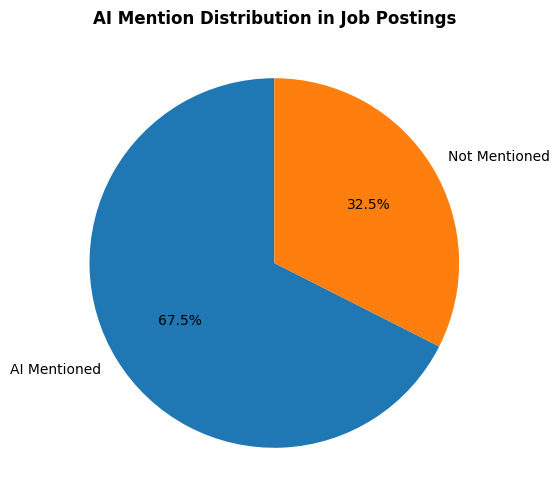

In [33]:
#AI Mentioned vs Not Mentioned
ai_counts = df['ai_mentioned'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ai_counts,
        labels=["AI Mentioned", "Not Mentioned"],
        autopct="%1.1f%%",
        startangle=90)
plt.title("AI Mention Distribution in Job Postings", fontweight="bold")
plt.show()

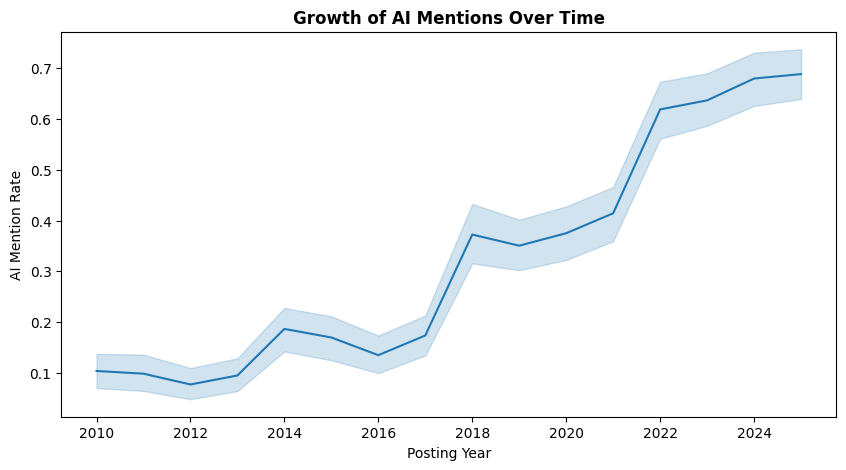

In [34]:
#AI Mention Growth Over Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="posting_year", y="ai_mentioned")
plt.title("Growth of AI Mentions Over Time", fontweight="bold")
plt.xlabel("Posting Year")
plt.ylabel("AI Mention Rate")
plt.show()

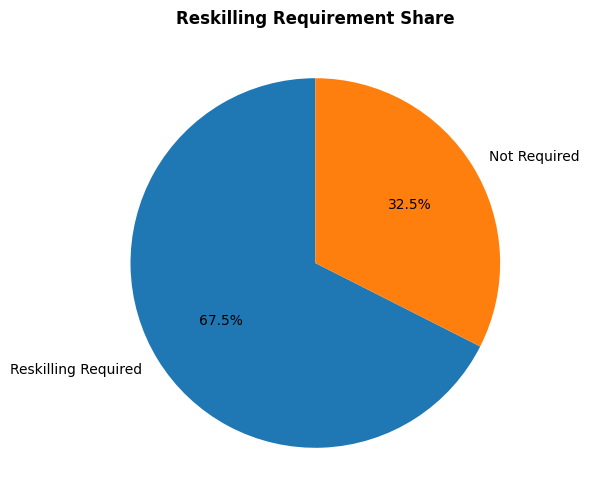

In [35]:
#Reskilling Requirement Distribution
reskill_counts = df['reskilling_required'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(reskill_counts,
        labels=["Reskilling Required", "Not Required"],
        autopct="%1.1f%%",
        startangle=90)
plt.title("Reskilling Requirement Share", fontweight="bold")
plt.show()

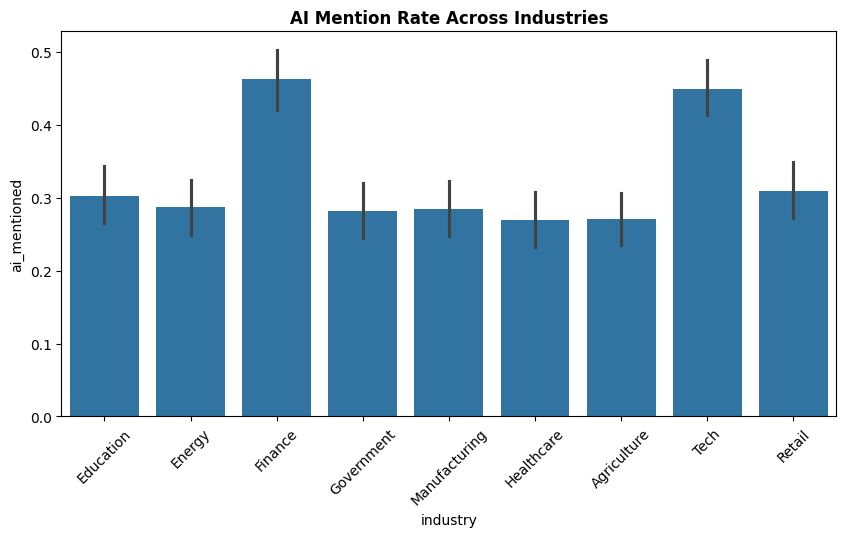

In [36]:
#Industry-wise AI Adoption
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="industry", y="ai_mentioned")
plt.title("AI Mention Rate Across Industries", fontweight="bold")
plt.xticks(rotation=45)
plt.show()

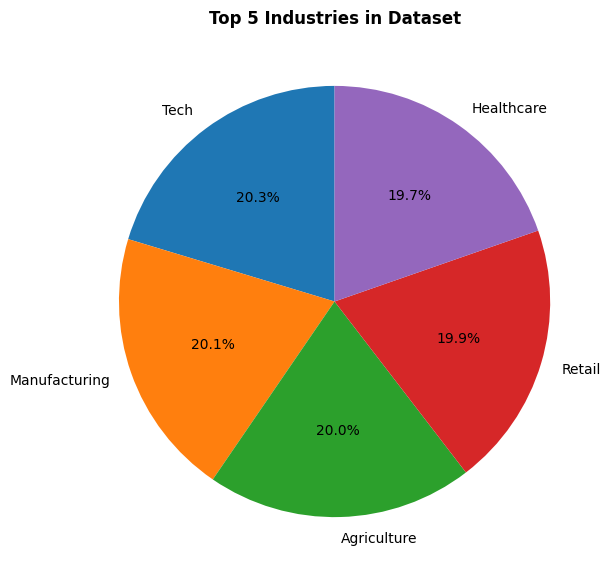

In [37]:
#Top 5 Industries Share
top_industries = df['industry'].value_counts().head(5)
plt.figure(figsize=(7,7))
plt.pie(top_industries,
        labels=top_industries.index,
        autopct="%1.1f%%",
        startangle=90)
plt.title("Top 5 Industries in Dataset", fontweight="bold")
plt.show()

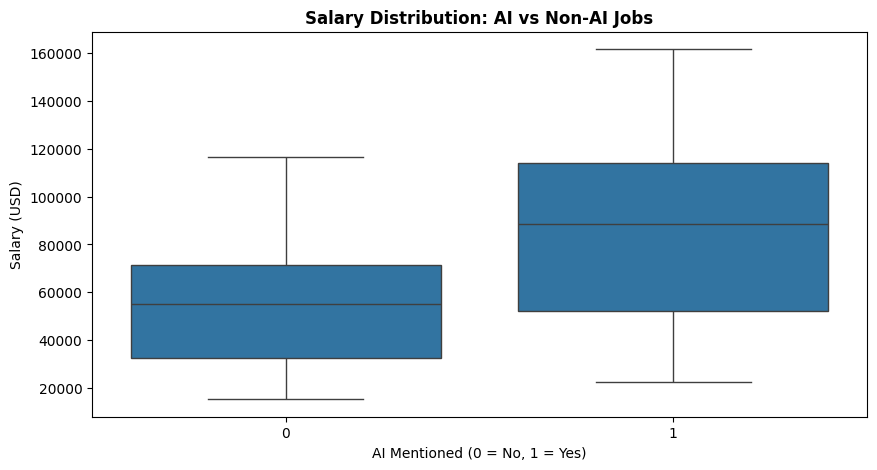

In [38]:
#Salary Comparison: AI vs Non-AI Jobs
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="ai_mentioned", y="salary_usd")
plt.title("Salary Distribution: AI vs Non-AI Jobs", fontweight="bold")
plt.xlabel("AI Mentioned (0 = No, 1 = Yes)")
plt.ylabel("Salary (USD)")
plt.show()

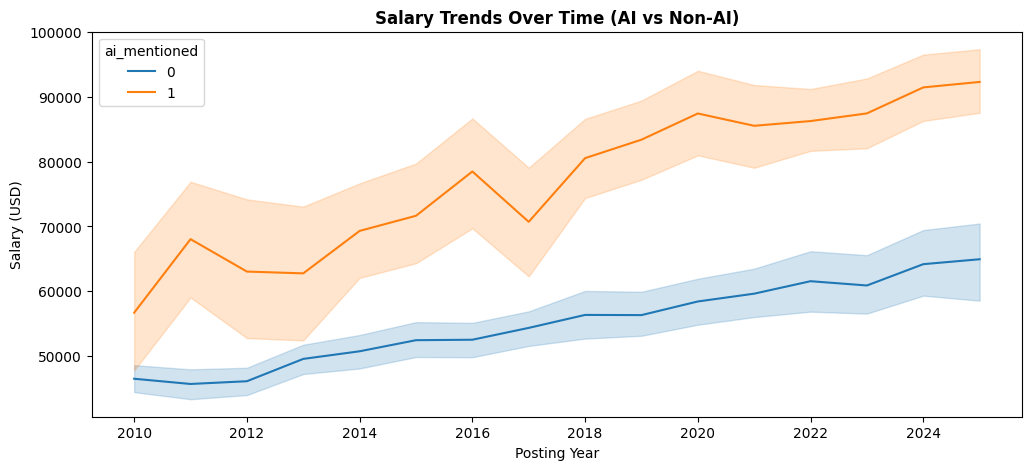

In [39]:
#Salary Trends Over Time
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="posting_year", y="salary_usd", hue="ai_mentioned")
plt.title("Salary Trends Over Time (AI vs Non-AI)", fontweight="bold")
plt.xlabel("Posting Year")
plt.ylabel("Salary (USD)")
plt.show()

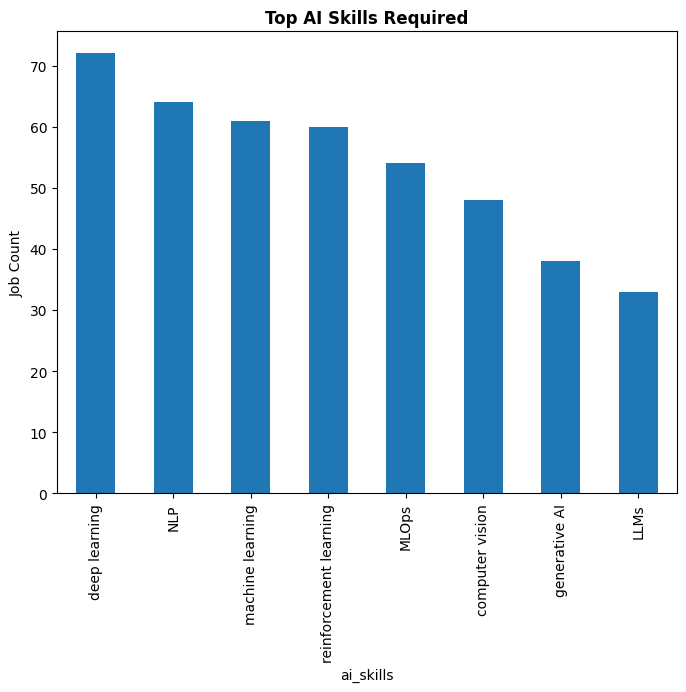

In [40]:
#Salary Trends Over Time
top_skills = df["ai_skills"].value_counts().head(8)
plt.figure(figsize=(8,6))
top_skills.plot(kind="bar")
plt.title("Top AI Skills Required", fontweight="bold")
plt.ylabel("Job Count")
plt.show()

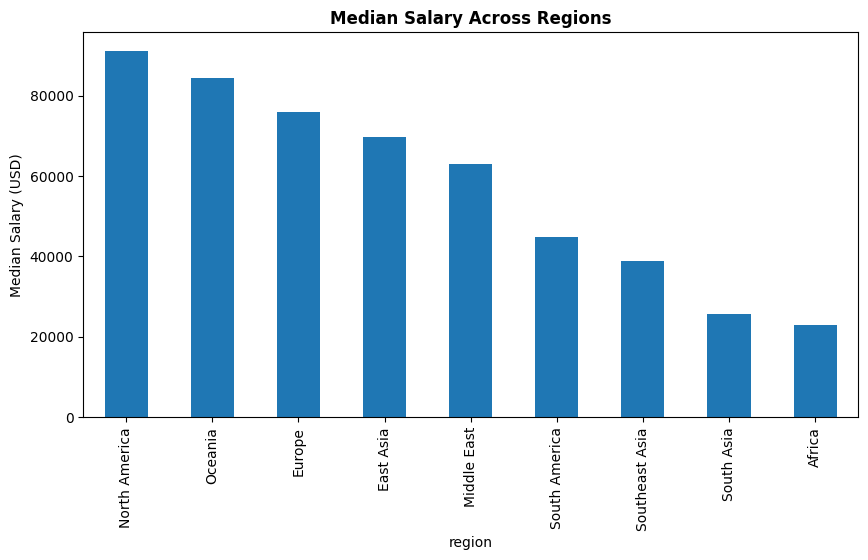

In [41]:
#Region-wise Salary Difference
region_salary = df.groupby("region")["salary_usd"].median().sort_values(ascending=False)
plt.figure(figsize=(10,5))
region_salary.plot(kind="bar")
plt.title("Median Salary Across Regions", fontweight="bold")
plt.ylabel("Median Salary (USD)")
plt.show()

In [ ]:
#Save Clean Dataset
df.to_csv("cleaned_ai_jobs.csv", index=False)
print("Clean dataset saved successfully!")